# Proyecto

#### Hector Fajardo - 8001842
#### Marcela Bethancourt - 09000253

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import re

### **Problema 1 -  Word Cloud**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/tw_source.csv/tw_source.csv',
                    encoding='latin_1', header=None)
dataset.columns = ['valor', 'id', 'fecha', 'fuente', 'usuario', 'tweet']
dataset.head()

,valor,id,fecha,fuente,usuario,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


**Los 3 usuarios más populares**

In [4]:
lista_menciones = []

for tweet in dataset['tweet']:
  ats_in_tweet = [palabra for palabra in tweet.split(' ') if '@' in palabra]
  lista_menciones.extend(ats_in_tweet)

In [5]:
contador_menciones = Counter(lista_menciones)
contador_menciones.most_common(4)[1:]

[('@mileycyrus', 4310), ('@tommcfly', 3837), ('@ddlovato', 3349)]

**Corpus**

In [6]:
dataset['menciones'] = dataset['tweet'].apply(lambda x: re.findall(r'@\w+', x))

mentions_expanded = dataset.explode('menciones')

populares = mentions_expanded['menciones'].value_counts().head(3)

In [7]:
listapopulares = populares.index.tolist()

# Realizar el filtro de los tweets que mencionan a los usuarios
corpus = {}

for user in listapopulares:
    usuario_tweets = mentions_expanded[mentions_expanded['menciones'] == user]

    # Se crea el dataframe
    usuario_corpus = usuario_tweets[['id', 'fecha', 'tweet']]
    usuario_corpus['Length'] = usuario_corpus['tweet'].apply(len)


    corpus[user] = usuario_corpus

    # Mostrar la información
    print(f"Información de {user}:")
    print(usuario_corpus.head(), "\n")

<ipython-input-7-e0bb585c73fc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuario_corpus['Length'] = usuario_corpus['tweet'].apply(len)
<ipython-input-7-e0bb585c73fc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuario_corpus['Length'] = usuario_corpus['tweet'].apply(len)


Información de @mileycyrus:
              id                         fecha  \
1021  1468063101  Mon Apr 06 23:30:57 PDT 2009   
2014  1468286517  Tue Apr 07 00:45:20 PDT 2009   
2073  1468297110  Tue Apr 07 00:49:07 PDT 2009   
2080  1468298918  Tue Apr 07 00:49:44 PDT 2009   
2156  1468318249  Tue Apr 07 00:56:41 PDT 2009   

                                                  tweet  Length  
1021  @mileycyrus hahaha dont be like that one time ...     107  
2014  @mileycyrus i have the same problem, but it's ...     137  
2073  @mileycyrus I guess counting sheep didn't work...      72  
2080  @mileycyrus I would too if it meant spending a...     100  
2156  @mileycyrus AWWW u seriously have the cutest d...     112   

Información de @tommcfly:
              id                         fecha  \
1690  1468210813  Tue Apr 07 00:19:09 PDT 2009   
1789  1468233211  Tue Apr 07 00:26:52 PDT 2009   
2514  1468391638  Tue Apr 07 01:23:07 PDT 2009   
3029  1468502040  Tue Apr 07 02:03:41 PDT 2009 

<ipython-input-7-e0bb585c73fc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuario_corpus['Length'] = usuario_corpus['tweet'].apply(len)


***Análisis del contexto***

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Descargar recursos de NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
# Inicializar stopwords y lematizador
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [10]:
# remover stopwords y aplicar lematización
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalnum() and token.lower() not in stop_words]
    return tokens

In [11]:
usuariocontexto = {}


for user in listapopulares:
    usuario_tweets = corpus[user]['tweet'].tolist()
    context_words = []

    for tweet in usuario_tweets:
        tokens = preprocess_text(tweet)
        if user.strip('@') in tokens:
            user_index = tokens.index(user.strip('@'))
            context_words.extend(tokens[max(0, user_index-5):user_index])
            context_words.extend(tokens[user_index+1:min(len(tokens), user_index+4)])

    usuariocontexto[user] = Counter(context_words)


    print(f"Palabras comunes para el usuario: {user}:")
    print(usuariocontexto[user].most_common(10), "\n")

Palabras comunes para el usuario: @mileycyrus:
[('miley', 572), ('http', 490), ('love', 391), ('u', 207), ('good', 187), ('hey', 173), ('quot', 173), ('hope', 138), ('vote', 134), ('come', 132)] 

Palabras comunes para el usuario: @tommcfly:
[('tom', 561), ('say', 190), ('http', 182), ('hey', 154), ('u', 147), ('please', 142), ('good', 138), ('love', 122), ('guy', 108), ('reply', 102)] 

Palabras comunes para el usuario: @ddlovato:
[('demi', 430), ('love', 246), ('http', 182), ('u', 173), ('wish', 170), ('hey', 120), ('come', 114), ('hope', 109), ('im', 108), ('please', 104)] 



**WordCloud**

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

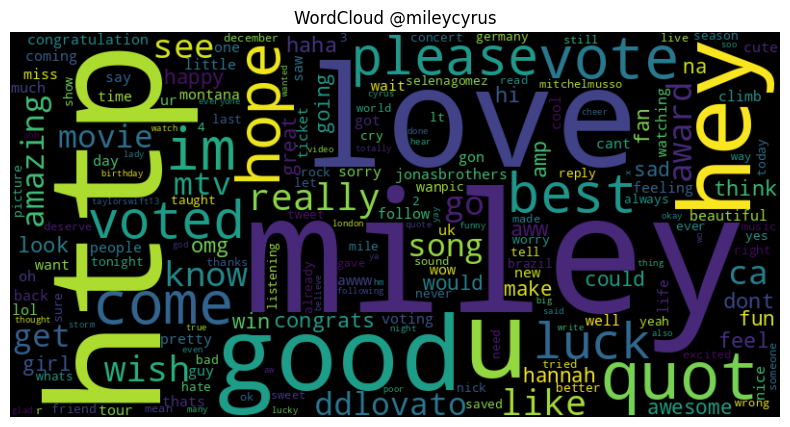

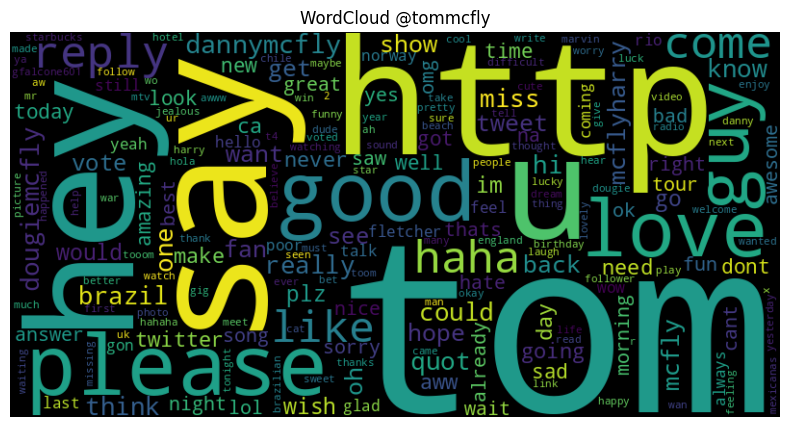

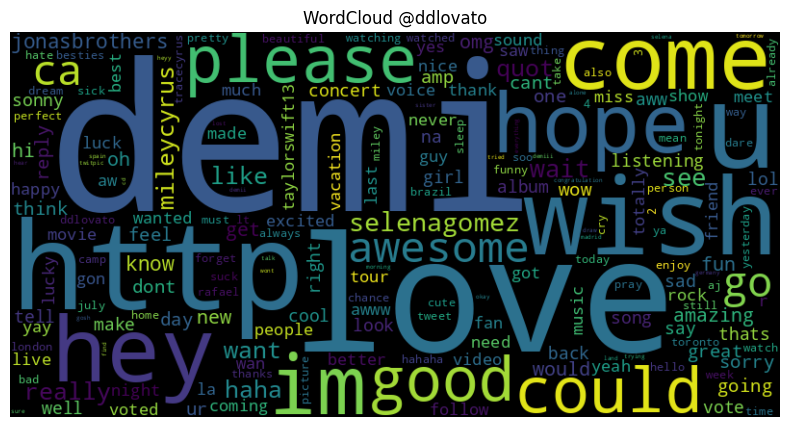

In [13]:

def generate_wordcloud(contadortexto, title):
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(contadortexto)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

for user in listapopulares:
    generate_wordcloud(usuariocontexto[user], f"WordCloud {user}")

## Problema 2

**Parte 1**

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers, models
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [16]:
# Generador de datos con aumento para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Cargar imágenes
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/tw_source.csv/Fruits_Vegetables_Dataset(12000)/Fruits',  # Carpeta con imágenes
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Múltiples clases
)

Found 5988 images belonging to 10 classes.


In [17]:
from tensorflow.keras import layers, models

# Red neuronal convolucional (CNN)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 clases: 5 frutas y 5 vegetales
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo con el generador de datos
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=2,
    validation_steps=50
)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 902s 8s/step - accuracy: 0.1648 - loss: 2.2163
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 358s 4s/step - accuracy: 0.3946 - loss: 1.7044


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [19]:
print(train_generator.num_classes)

10


**Parte 2**

In [20]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
# Dividir conjunto de datos
# Crear generadores para entrenamiento, validación y prueba
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% de los datos para validación
)

# Conjunto de entrenamiento y validación
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/tw_source.csv/Fruits_Vegetables_Dataset(12000)/Vegetables',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/tw_source.csv/Fruits_Vegetables_Dataset(12000)/Vegetables',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4804 images belonging to 10 classes.
Found 1194 images belonging to 10 classes.


In [22]:
#Arquitectura 1: CNN básica
from tensorflow.keras import layers, models

# Arquitectura CNN 1: básica
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compilar el modelo
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history1 = model1.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


151/151 ━━━━━━━━━━━━━━━━━━━━ 1833s 12s/step - accuracy: 0.2544 - loss: 2.0945 - val_accuracy: 0.5595 - val_loss: 1.2160
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 423s 2s/step - accuracy: 0.5700 - loss: 1.1678 - val_accuracy: 0.6248 - val_loss: 1.0799
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 0.6401 - loss: 0.9898 - val_accuracy: 0.6901 - val_loss: 0.9118
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - accuracy: 0.6933 - loss: 0.8856 - val_accuracy: 0.7044 - val_loss: 0.8805
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.7351 - loss: 0.7423 - val_accuracy: 0.7211 - val_loss: 0.8067
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.7360 - loss: 0.7186 - val_accuracy: 0.7127 - val_loss: 0.8087
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 381s 2s/step - accuracy: 0.7503 - loss: 0.6640 - val_accuracy: 0.7630 - val_loss: 0.7020
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.7706 - loss: 0.6626 - val_accuracy: 0.7

In [ ]:
# Arquitectura 2: CNN con más capas convolucionales
# Arquitectura CNN 2: más capas
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compilar y entrenar
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history2 = model2.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

In [ ]:
# Arquitectura 3: CNN con dropout
# Arquitectura CNN 3: con dropout
model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout para evitar sobreajuste
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compilar y entrenar
model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history3 = model3.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

In [ ]:
# Evaluar los modelos
# Evaluar en el conjunto de validación
val_loss1, val_acc1 = model1.evaluate(validation_generator)
val_loss2, val_acc2 = model2.evaluate(validation_generator)
val_loss3, val_acc3 = model3.evaluate(validation_generator)

print(f"Modelo 1: Accuracy en validación: {val_acc1}")
print(f"Modelo 2: Accuracy en validación: {val_acc2}")
print(f"Modelo 3: Accuracy en validación: {val_acc3}")

Modelo 2 es mejor debido a la mayor cantidad de capas convolucionales, que permiten extraer características más complejas de las imágenes.
Modelo 3 podría ser mejor si evitó el sobreajuste gracias al uso de dropout.

In [ ]:
# Gráficar
import matplotlib.pyplot as plt

# Función para graficar el rendimiento del modelo
def plot_training_history(history, model_name):
    # Graficar precisión (accuracy)
    plt.plot(history.history['accuracy'], label=f'{model_name} - accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{model_name} - val_accuracy')

    # Graficar pérdida (loss)
    plt.figure()
    plt.plot(history.history['loss'], label=f'{model_name} - loss')
    plt.plot(history.history['val_loss'], label=f'{model_name} - val_loss')

# Graficar resultados del Modelo 1
plot_training_history(history1, "Modelo 1")

# Graficar resultados del Modelo 2
plot_training_history(history2, "Modelo 2")

# Graficar resultados del Modelo 3
plot_training_history(history3, "Modelo 3")

# Mostrar leyenda y títulos
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Precisión/Pérdida')
plt.title('Rendimiento del Modelo durante el Entrenamiento')
plt.show()